# Heart Disease prediction

### 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import skew
from scipy.stats import gaussian_kde
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, f1_score
import torch
import torch.nn as nn
import torch.optim as optim

### 2. Importing data

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 3. Data preprocessing

In [3]:
df = df.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Constrictive Pericarditis (CP)',
    'trestbps': 'Resting BP',
    'chol': 'Cholestrol',
    'fbs': 'Fasting Blood Sugar',
    'restecg': 'Resting ECG',
    'thalach': 'Maximum Heart Rate',
    'exang': 'Exercise Induced Angina',
    'oldpeak': 'Oldpeak',
    'slope': 'Slope',
    'ca': 'Coronary Artery Calcium',
    'thal': 'Thalassemia',
    'target': 'Target',
})

df.head()

,Age,Sex,Constrictive Pericarditis (CP),Resting BP,Cholestrol,Fasting Blood Sugar,Resting ECG,Maximum Heart Rate,Exercise Induced Angina,Oldpeak,Slope,Coronary Artery Calcium,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.dtypes

Age                                 int64
Sex                                 int64
Constrictive Pericarditis (CP)      int64
Resting BP                          int64
Cholestrol                          int64
Fasting Blood Sugar                 int64
Resting ECG                         int64
Maximum Heart Rate                  int64
Exercise Induced Angina             int64
Oldpeak                           float64
Slope                               int64
Coronary Artery Calcium             int64
Thalassemia                         int64
Target                              int64
dtype: object

In [5]:
df.isnull().sum()

Age                               0
Sex                               0
Constrictive Pericarditis (CP)    0
Resting BP                        0
Cholestrol                        0
Fasting Blood Sugar               0
Resting ECG                       0
Maximum Heart Rate                0
Exercise Induced Angina           0
Oldpeak                           0
Slope                             0
Coronary Artery Calcium           0
Thalassemia                       0
Target                            0
dtype: int64

In [6]:
# Checking the skewness of the data
def check_skewness(df):
    for col in df.columns:
        skewness = skew(df[col].dropna())
        print(f"{col}: {skewness:.2f}")

check_skewness(df)

Age: -0.20
Sex: -0.79
Constrictive Pericarditis (CP): 0.48
Resting BP: 0.71
Cholestrol: 1.14
Fasting Blood Sugar: 1.98
Resting ECG: 0.16
Maximum Heart Rate: -0.53
Exercise Induced Angina: 0.74
Oldpeak: 1.26
Slope: -0.51
Coronary Artery Calcium: 1.30
Thalassemia: -0.47
Target: -0.18


In [7]:
threshold = 3
z_scores = (df - df.mean()) / df.std()
outliers_zscore = df[np.abs(z_scores) > threshold].dropna()

print("Outliers detected using Z-Score method:")
print(outliers_zscore)

Outliers detected using Z-Score method:
Empty DataFrame
Columns: [Age, Sex, Constrictive Pericarditis (CP), Resting BP, Cholestrol, Fasting Blood Sugar, Resting ECG, Maximum Heart Rate, Exercise Induced Angina, Oldpeak, Slope, Coronary Artery Calcium, Thalassemia, Target]
Index: []


### 4. Exploratory Data Analysis

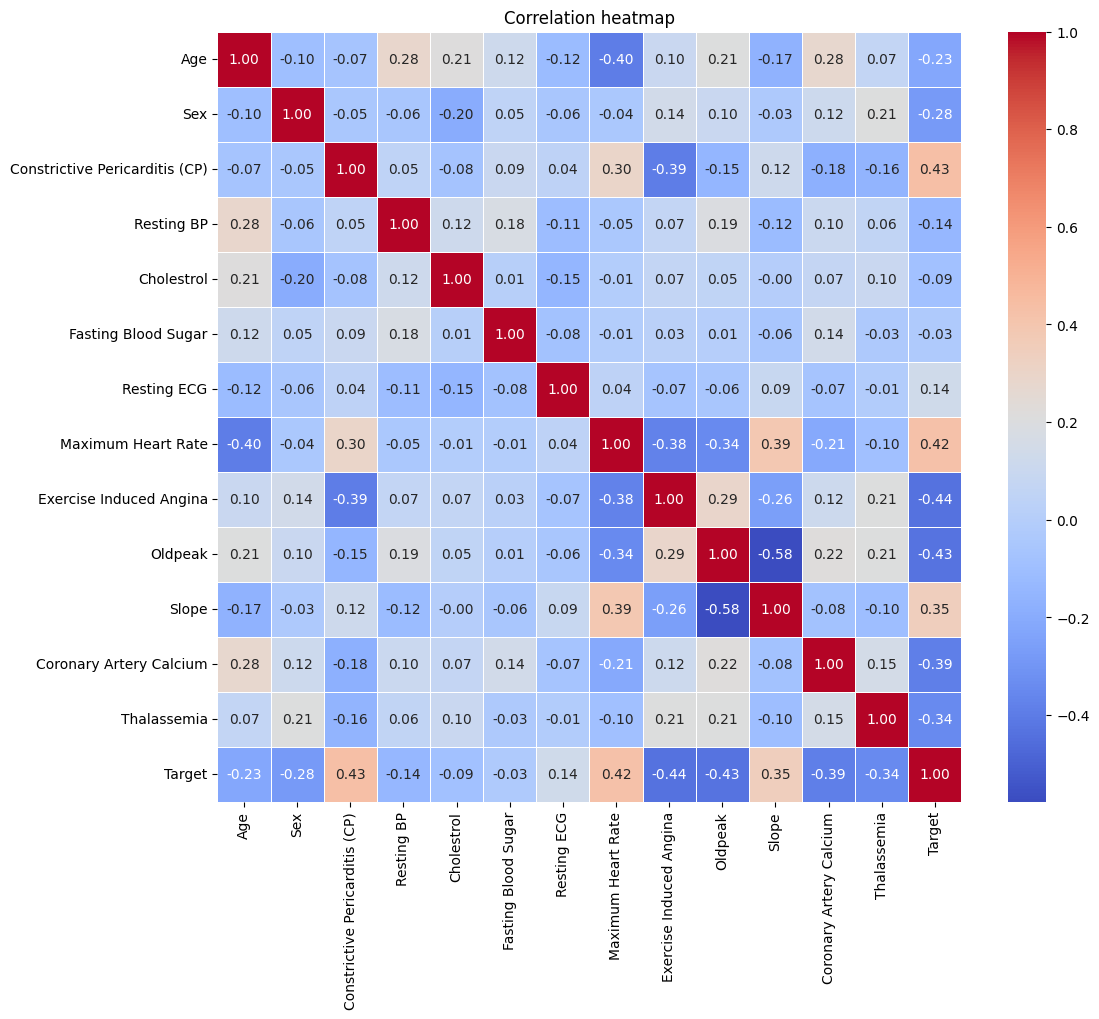

In [8]:
#Heatmap
#This plot shows the correlation of each attribute of the data


corr = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation heatmap")
plt.show()

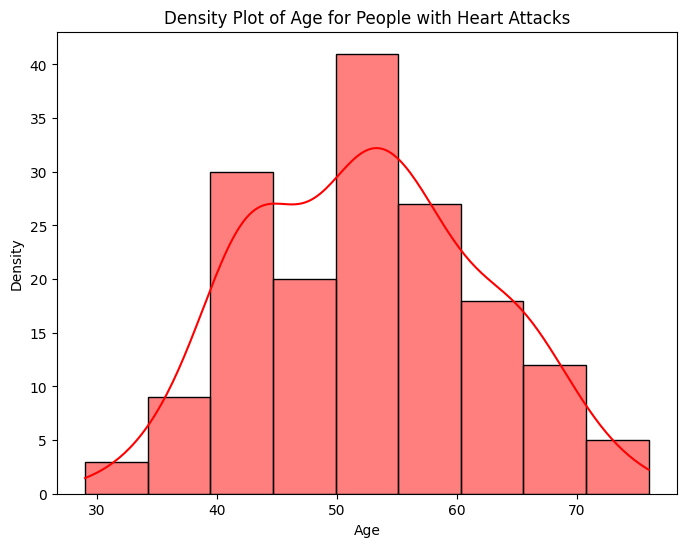

In [9]:
#Density plot
#This plot shows the age group of people who have the maximum number of heart attacks


#Filter the dataset to include only instances where the target variable indicates the presence of a heart attack
df_heart_attack = df[df['Target'] == 1]

plt.figure(figsize=(8, 6))
sns.histplot(data=df_heart_attack, x='Age', kde=True, color='red')
plt.title('Density Plot of Age for People with Heart Attacks')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


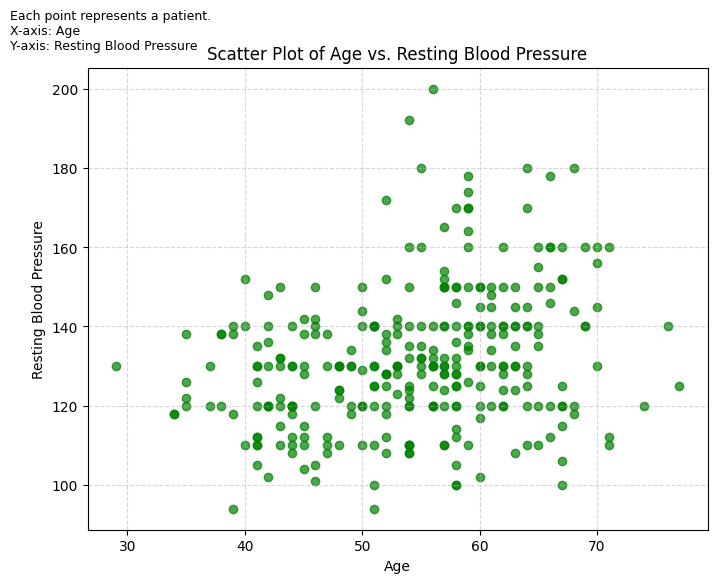

In [10]:
#Scatter plot
#This shows the graph for age vs. resting blood pressure


plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Resting BP'], alpha=0.7, color='green')
plt.title('Scatter Plot of Age vs. Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.text(20, 210, 'Each point represents a patient.\nX-axis: Age\nY-axis: Resting Blood Pressure', fontsize=9)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<Figure size 1200x1000 with 0 Axes>

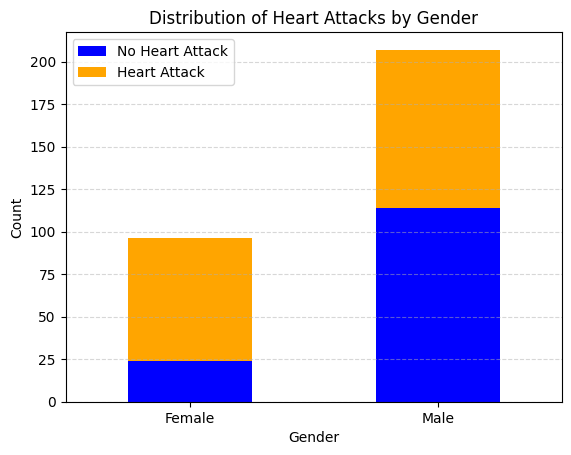

In [11]:
#Stacked Bar Chart
#This shows the number of heart attacks in males and females

#Group data by 'Sex' and 'Target'
gender_heart_attacks = df.groupby(['Sex', 'Target']).size().unstack()

plt.figure(figsize=(12, 10))
gender_heart_attacks.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.title('Distribution of Heart Attacks by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.legend(['No Heart Attack', 'Heart Attack'], loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### 5. Machine Learning

In [12]:
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression

In [13]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [14]:
logreg_pred = logreg_model.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.8524590163934426


#### K-Nearest Neighbors (KNN)

In [15]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [16]:
knn_pred = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.9016393442622951


#### Support Vector Machines (SVM)

In [17]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [18]:
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8688524590163934


#### Random Forest

In [19]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [20]:
rf_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8688524590163934


### 6. Deep Learning

In [21]:
# Convert data to PyTorch tensors
X = df.drop('Target', axis=1).values.astype(np.float32)  # Features
y = df['Target'].values.astype(np.float32)  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train).unsqueeze(1)  # Add extra dimension for compatibility
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test).unsqueeze(1)  # Add extra dimension for compatibility

# Define a simple ANN model
class ANN(nn.Module):
    def __init__(self, input_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Instantiate the model
input_size = X_train.shape[1]
model = ANN(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
batch_size = 64

for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        targets = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Calculate accuracy after each epoch
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predicted = (outputs >= 0.5).float()  # Convert probabilities to binary predictions
        accuracy = (predicted == y_test_tensor).float().mean()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.4f}')
print(f'Model Accuracy: {accuracy.item():.4f}')

Epoch [1/10], Loss: 0.7109, Accuracy: 0.4754
Epoch [2/10], Loss: 0.6893, Accuracy: 0.5082
Epoch [3/10], Loss: 0.6695, Accuracy: 0.6066
Epoch [4/10], Loss: 0.6499, Accuracy: 0.6557
Epoch [5/10], Loss: 0.6296, Accuracy: 0.7049
Epoch [6/10], Loss: 0.6081, Accuracy: 0.7705
Epoch [7/10], Loss: 0.5855, Accuracy: 0.8033
Epoch [8/10], Loss: 0.5616, Accuracy: 0.8197
Epoch [9/10], Loss: 0.5366, Accuracy: 0.8197
Epoch [10/10], Loss: 0.5104, Accuracy: 0.8525
Model Accuracy: 0.8525


C:\Users\shrey\AppData\Local\Temp\ipykernel_5076\2424701263.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cholesterol_grouped = df.groupby('Cholesterol_bins')['Target'].mean().reset_index()
C:\Users\shrey\AppData\Local\Temp\ipykernel_5076\2424701263.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resting_bp_grouped = df.groupby('Resting_BP_bins')['Target'].mean().reset_index()


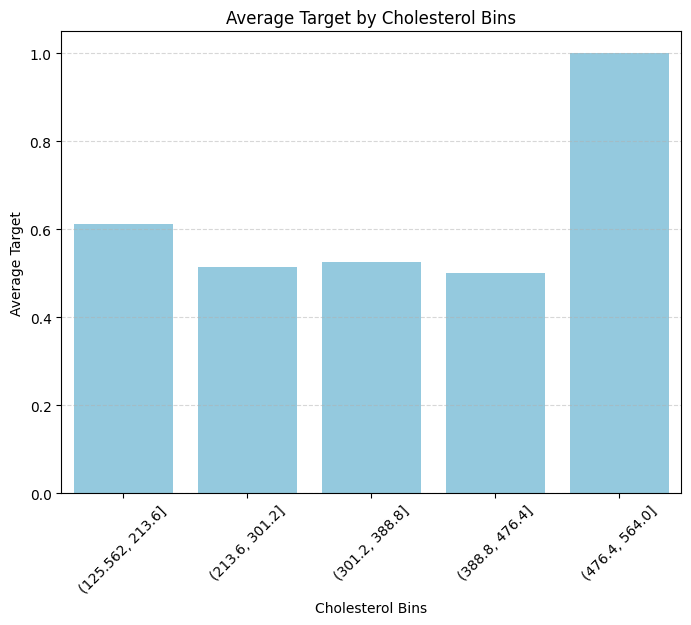

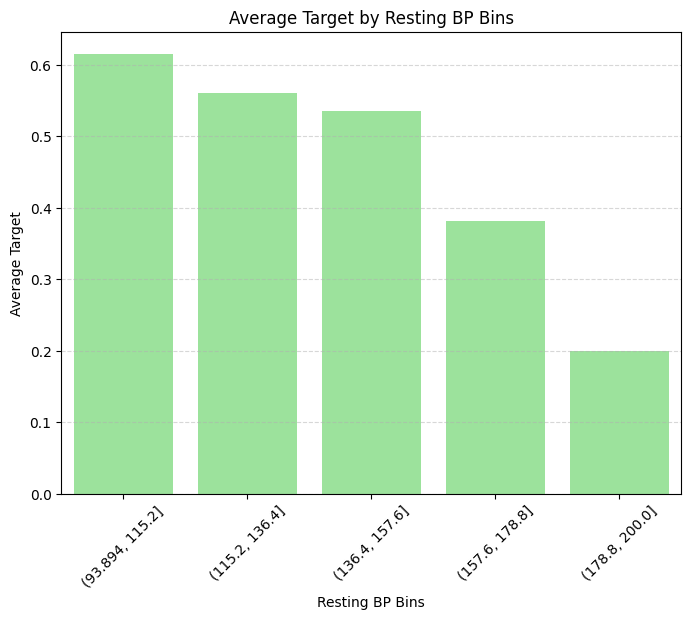

In [22]:
# Discretize cholesterol and resting bp into bins
df['Cholesterol_bins'] = pd.cut(df['Cholestrol'], bins=5)
df['Resting_BP_bins'] = pd.cut(df['Resting BP'], bins=5)

# Group by Cholesterol bins and calculate mean target values
cholesterol_grouped = df.groupby('Cholesterol_bins')['Target'].mean().reset_index()

# Group by Resting BP bins and calculate mean target values
resting_bp_grouped = df.groupby('Resting_BP_bins')['Target'].mean().reset_index()

# Bar plot for cholesterol vs. target
plt.figure(figsize=(8, 6))
sns.barplot(data=cholesterol_grouped, x='Cholesterol_bins', y='Target', color='skyblue')
plt.title('Average Target by Cholesterol Bins')
plt.xlabel('Cholesterol Bins')
plt.ylabel('Average Target')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Bar plot for resting bp vs. target
plt.figure(figsize=(8, 6))
sns.barplot(data=resting_bp_grouped, x='Resting_BP_bins', y='Target', color='lightgreen')
plt.title('Average Target by Resting BP Bins')
plt.xlabel('Resting BP Bins')
plt.ylabel('Average Target')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

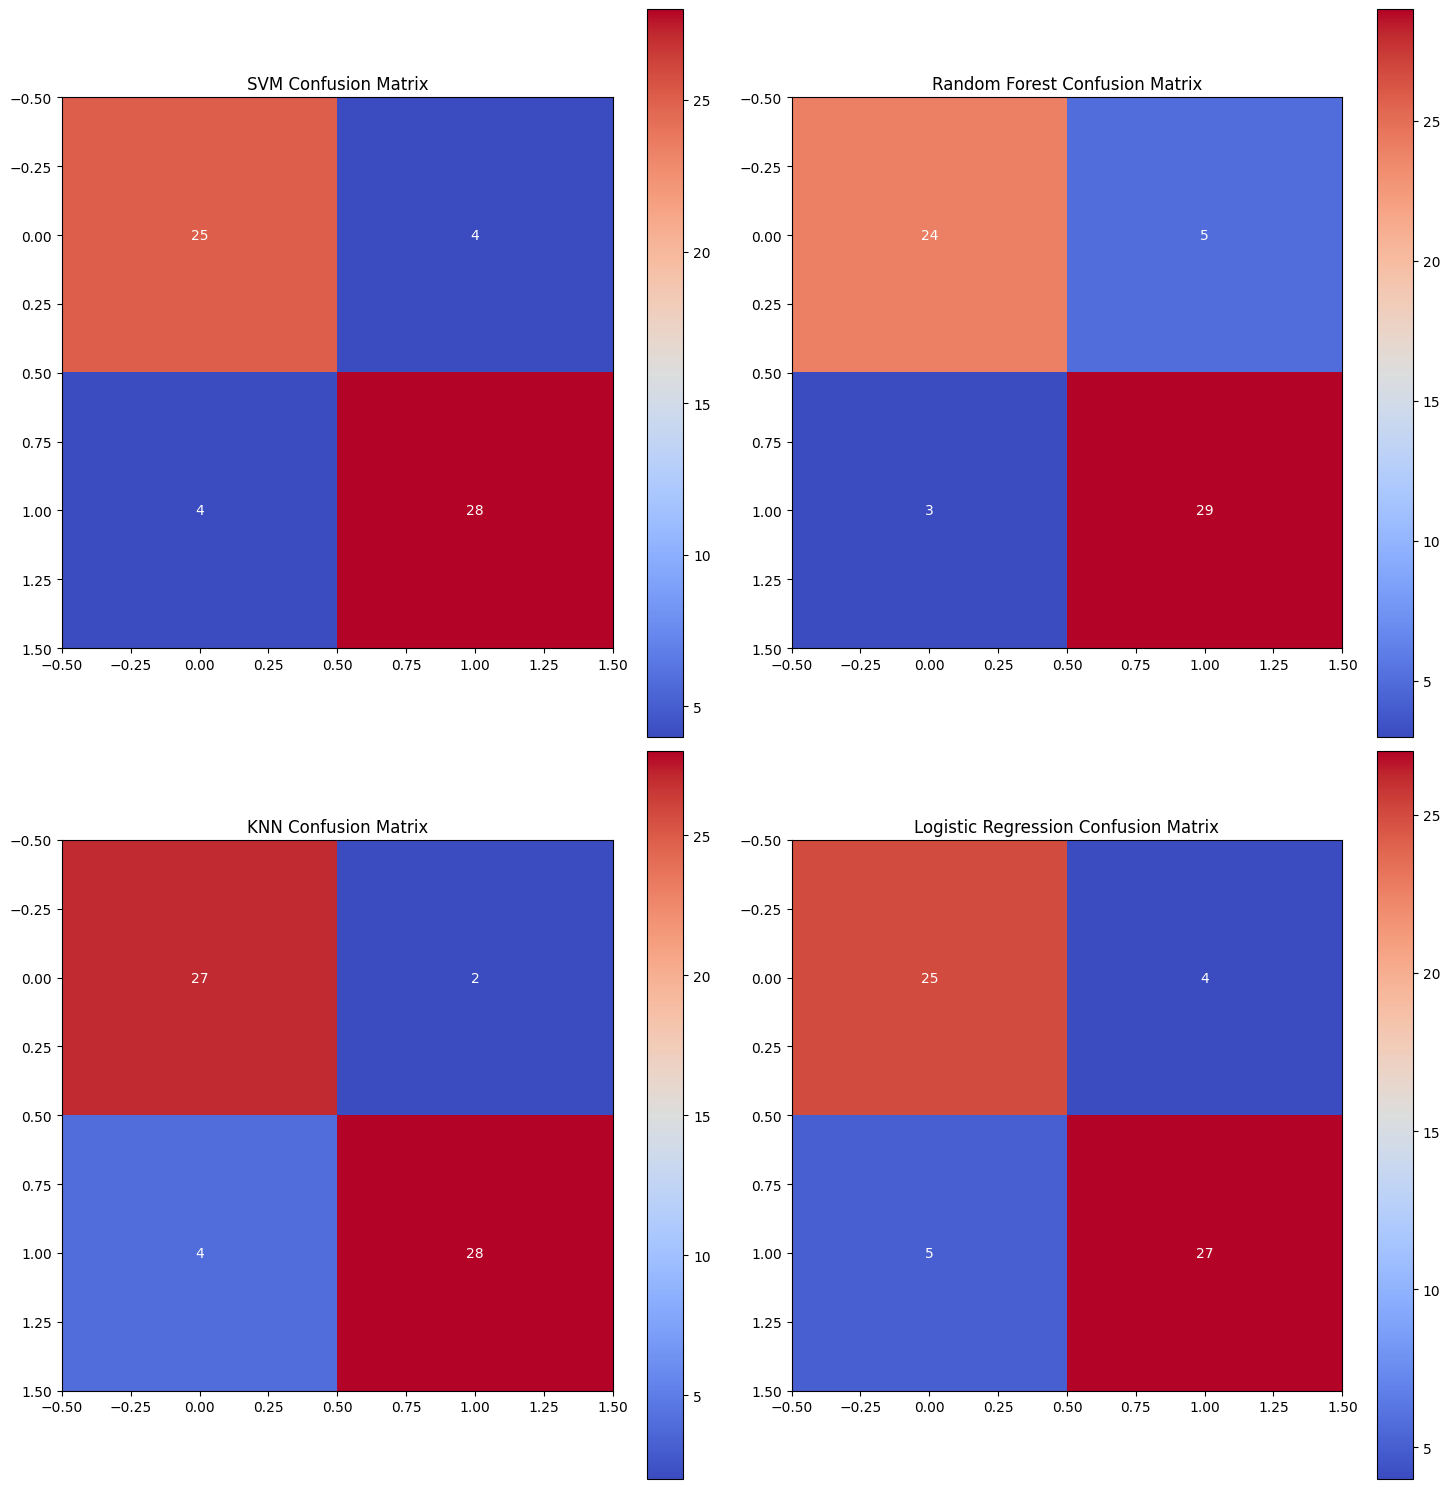

In [23]:
# Creating subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

# Plotting confusion matrix for SVM
svm_conf_matrix = confusion_matrix(y_test, svm_pred)
svm_heatmap = ax[0, 0].imshow(svm_conf_matrix, cmap='coolwarm')
ax[0, 0].set_title('SVM Confusion Matrix')
plt.colorbar(svm_heatmap, ax=ax[0, 0])
for i in range(len(svm_conf_matrix)):
    for j in range(len(svm_conf_matrix)):
        ax[0, 0].text(j, i, svm_conf_matrix[i, j], ha='center', va='center', color='white')

# Plotting confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_heatmap = ax[0, 1].imshow(rf_conf_matrix, cmap='coolwarm')
ax[0, 1].set_title('Random Forest Confusion Matrix')
plt.colorbar(rf_heatmap, ax=ax[0, 1])
for i in range(len(rf_conf_matrix)):
    for j in range(len(rf_conf_matrix)):
        ax[0, 1].text(j, i, rf_conf_matrix[i, j], ha='center', va='center', color='white')

# Plotting confusion matrix for KNN
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_heatmap = ax[1, 0].imshow(knn_conf_matrix, cmap='coolwarm')
ax[1, 0].set_title('KNN Confusion Matrix')
plt.colorbar(knn_heatmap, ax=ax[1, 0])
for i in range(len(knn_conf_matrix)):
    for j in range(len(knn_conf_matrix)):
        ax[1, 0].text(j, i, knn_conf_matrix[i, j], ha='center', va='center', color='white')

# Plotting confusion matrix for Logistic Regression
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
logreg_heatmap = ax[1, 1].imshow(logreg_conf_matrix, cmap='coolwarm')
ax[1, 1].set_title('Logistic Regression Confusion Matrix')
plt.colorbar(logreg_heatmap, ax=ax[1, 1])
for i in range(len(logreg_conf_matrix)):
    for j in range(len(logreg_conf_matrix)):
        ax[1, 1].text(j, i, logreg_conf_matrix[i, j], ha='center', va='center', color='white')

# Display the plots
plt.tight_layout()
plt.show()


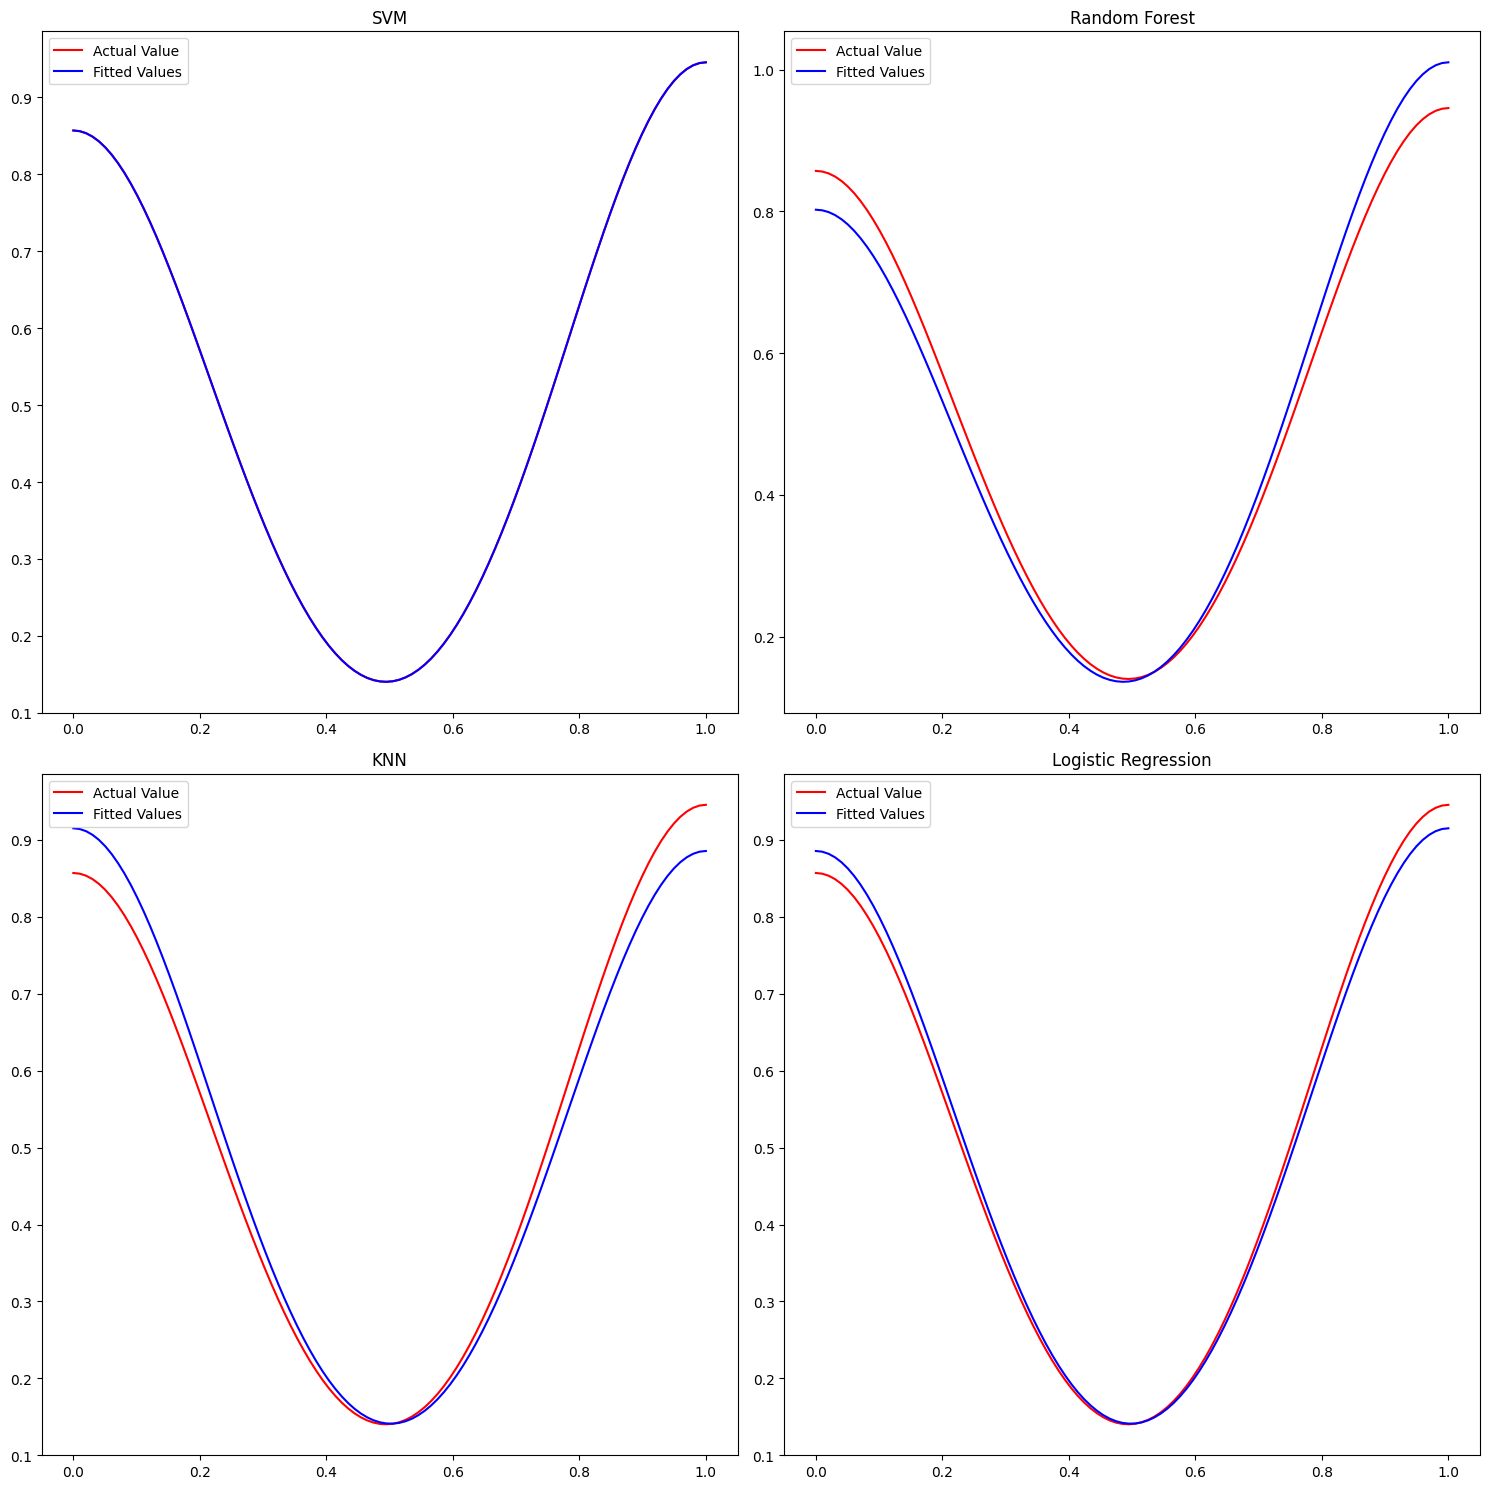

In [24]:
# Creating subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

# Plotting density plot for SVM
svm_density_actual = gaussian_kde(y_test)
svm_density_fitted = gaussian_kde(svm_pred)
x = np.linspace(min(y_test.min(), svm_pred.min()), max(y_test.max(), svm_pred.max()), 100)
ax[0, 0].plot(x, svm_density_actual(x), color="r", label="Actual Value")
ax[0, 0].plot(x, svm_density_fitted(x), color="b", label="Fitted Values")
ax[0, 0].set_title('SVM')
ax[0, 0].legend()

# Plotting density plot for Random Forest
rf_density_actual = gaussian_kde(y_test)
rf_density_fitted = gaussian_kde(rf_pred)
ax[0, 1].plot(x, rf_density_actual(x), color="r", label="Actual Value")
ax[0, 1].plot(x, rf_density_fitted(x), color="b", label="Fitted Values")
ax[0, 1].set_title('Random Forest')
ax[0, 1].legend()

# Plotting density plot for KNN
knn_density_actual = gaussian_kde(y_test)
knn_density_fitted = gaussian_kde(knn_pred)
ax[1, 0].plot(x, knn_density_actual(x), color="r", label="Actual Value")
ax[1, 0].plot(x, knn_density_fitted(x), color="b", label="Fitted Values")
ax[1, 0].set_title('KNN')
ax[1, 0].legend()

# Plotting density plot for Logistic Regression
logreg_density_actual = gaussian_kde(y_test)
logreg_density_fitted = gaussian_kde(logreg_pred)
ax[1, 1].plot(x, logreg_density_actual(x), color="r", label="Actual Value")
ax[1, 1].plot(x, logreg_density_fitted(x), color="b", label="Fitted Values")
ax[1, 1].set_title('Logistic Regression')
ax[1, 1].legend()

# Display the plots
plt.tight_layout()
plt.show()


In [25]:
print('SVM Classification Report: \n', classification_report(y_test, svm_pred))
print('Random Forest Classification Report: \n', classification_report(y_test, rf_pred))
print('KNN Classification Report: \n', classification_report(y_test, knn_pred))
print('Logistic Regression Report: \n', classification_report(y_test, logreg_pred))

SVM Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        29
         1.0       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Random Forest Classification Report: 
               precision    recall  f1-score   support

         0.0       0.89      0.83      0.86        29
         1.0       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

KNN Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      0.93      0.90        29
         1.0       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.

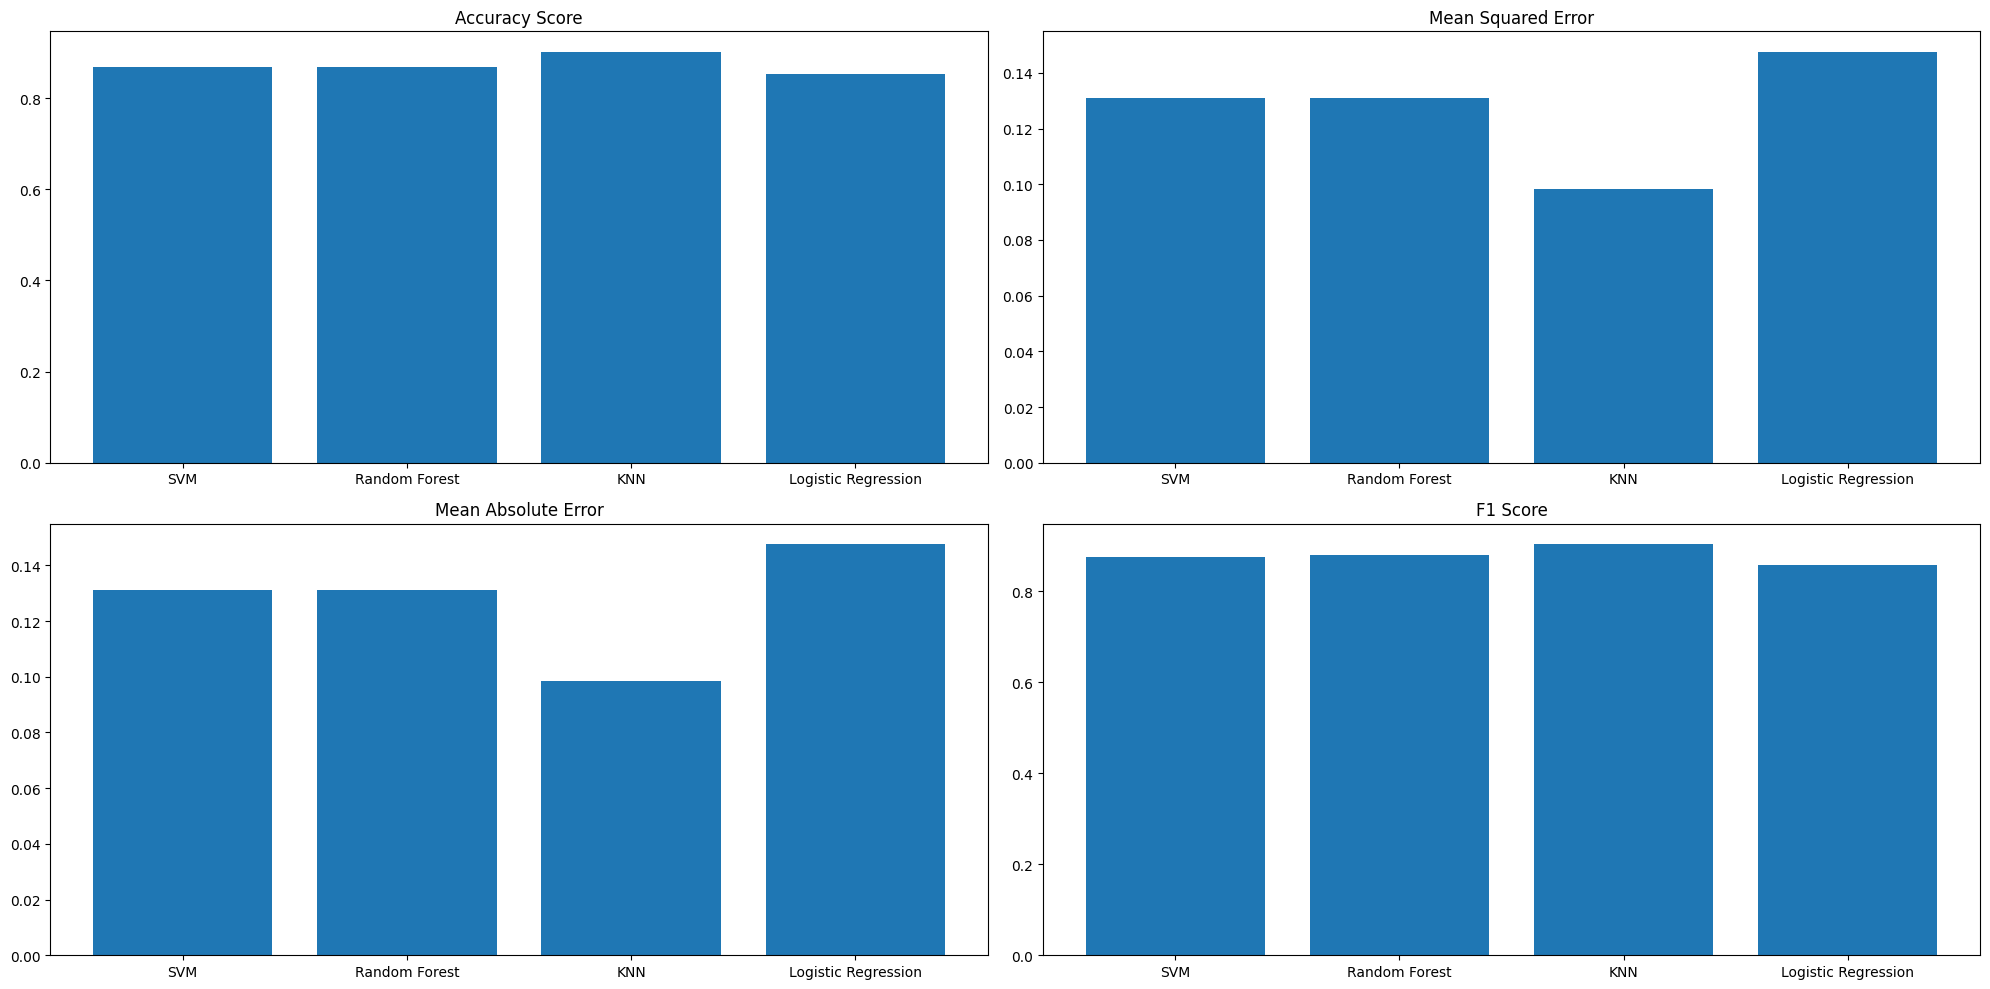

In [26]:
# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

# Accuracy Score
models = ['SVM', 'Random Forest', 'KNN', 'Logistic Regression']
accuracy_scores = [accuracy_score(y_test, svm_pred), accuracy_score(y_test, rf_pred), accuracy_score(y_test, knn_pred), accuracy_score(y_test, logreg_pred)]
ax[0, 0].bar(models, accuracy_scores)
ax[0, 0].set_title('Accuracy Score')

# Mean Squared Error
mse_scores = [mean_squared_error(y_test, svm_pred), mean_squared_error(y_test, rf_pred), mean_squared_error(y_test, knn_pred), mean_squared_error(y_test, logreg_pred)]
ax[0, 1].bar(models, mse_scores)
ax[0, 1].set_title('Mean Squared Error')

# Mean Absolute Error
mae_scores = [mean_absolute_error(y_test, svm_pred), mean_absolute_error(y_test, rf_pred), mean_absolute_error(y_test, knn_pred), mean_absolute_error(y_test, logreg_pred)]
ax[1, 0].bar(models, mae_scores)
ax[1, 0].set_title('Mean Absolute Error')

# F1 Score
f1_scores = [f1_score(y_test, svm_pred), f1_score(y_test, rf_pred), f1_score(y_test, knn_pred), f1_score(y_test, logreg_pred)]
ax[1, 1].bar(models, f1_scores)
ax[1, 1].set_title('F1 Score')

# Display the plots
plt.tight_layout()
plt.show()
